In [1]:
# Import Required Libraries

import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Read Data

wine = pd.read_csv("wine.csv")
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#### EDA

In [3]:
# Dropping the non-numerical Type column

wine_type = wine[['Type']]
wine.drop(['Type'], axis=1, inplace=True)
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
wine.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
# Check for missing values

wine.isna().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [7]:
# Check for Duplicated values

wine[wine.duplicated()]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


### PCA

In [8]:
# Standardization the numerical data 

std = StandardScaler()
wine_normal=std.fit_transform(wine)
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [9]:
pca = PCA(n_components=None)
data = pca.fit_transform(wine_normal)
pca_components = pd.DataFrame(data,columns=['a','b','c','d','e','f','g','h','i','j','k','l','m'])
pca_components

,a,b,c,d,e,f,g,h,i,j,k,l,m
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [10]:
# Correlation between the PCA components

pca_components.corr()

,a,b,c,d,e,f,g,h,i,j,k,l,m
a,1.000000e+00,-1.717656e-16,-7.555502e-17,-1.607624e-16,-3.859760e-17,1.184496e-16,-2.060973e-16,-1.237101e-16,2.567756e-17,0.000000e+00,-1.089162e-16,1.350767e-16,-3.934685e-17
b,-1.717656e-16,1.000000e+00,2.363310e-16,-4.117481e-17,1.743455e-16,-5.223212e-17,-1.126949e-16,-1.009626e-16,3.818809e-17,-2.364025e-17,-2.658166e-17,-8.647246e-18,-3.682905e-18
c,-7.555502e-17,2.363310e-16,1.000000e+00,-3.733299e-17,-7.075110e-17,1.288537e-16,2.304930e-16,1.133405e-16,2.702058e-17,4.258422e-17,-7.313395e-17,-2.547187e-16,2.040666e-16
d,-1.607624e-16,-4.117481e-17,-3.733299e-17,1.000000e+00,7.952432e-16,-2.901746e-16,-3.404310e-16,-3.215509e-16,-2.221345e-16,4.530023e-17,-3.245159e-16,3.484283e-16,-2.711624e-16
e,-3.859760e-17,1.743455e-16,-7.075110e-17,7.952432e-16,1.000000e+00,-1.251793e-16,-2.532501e-16,-6.634159e-17,1.206063e-16,7.161502e-17,3.517076e-17,1.368340e-16,-1.554087e-16
f,1.184496e-16,-5.223212e-17,1.288537e-16,-2.901746e-16,-1.251793e-16,1.000000e+00,-3.060782e-17,2.055964e-16,-2.296198e-16,8.743973e-18,-1.673477e-16,-4.743129e-16,3.139161e-16
g,-2.060973e-16,-1.126949e-16,2.304930e-16,-3.404310e-16,-2.532501e-16,-3.060782e-17,1.000000e+00,-3.950639e-16,2.096176e-16,1.700716e-17,3.933398e-17,2.759746e-16,-3.328691e-16
h,-1.237101e-16,-1.009626e-16,1.133405e-16,-3.215509e-16,-6.634159e-17,2.055964e-16,-3.950639e-16,1.000000e+00,4.078964e-16,4.996400e-16,-1.020036e-16,-1.166969e-16,9.858204e-17
i,2.567756e-17,3.818809e-17,2.702058e-17,-2.221345e-16,1.206063e-16,-2.296198e-16,2.096176e-16,4.078964e-16,1.000000e+00,-8.021745e-17,3.174855e-16,1.193467e-16,1.227147e-16
j,0.000000e+00,-2.364025e-17,4.258422e-17,4.530023e-17,7.161502e-17,8.743973e-18,1.700716e-17,4.996400e-16,-8.021745e-17,1.000000e+00,-4.088004e-16,-1.442579e-16,2.207490e-16


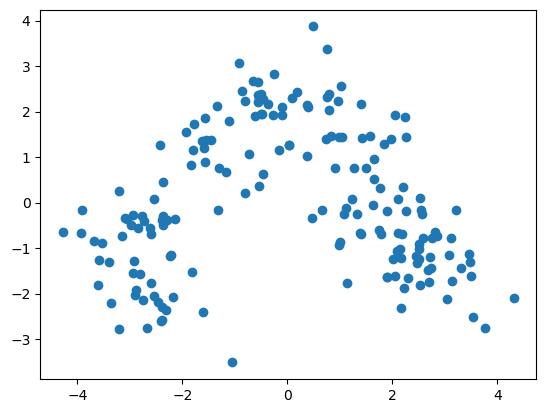

In [11]:
# Correlation between 2 components

plt.scatter(pca_components.a,pca_components.b)

In [12]:
# The amount of variance that each PCA explains is given by the eigen values

var = pca.explained_variance_ratio_  
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [13]:
# Cumulative variance 

var1 = np.cumsum(np.round(var,decimals = 4)*100)   # 36%, 55%, 66%, 73%, 80%, etc
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [14]:
pca.components_ 

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

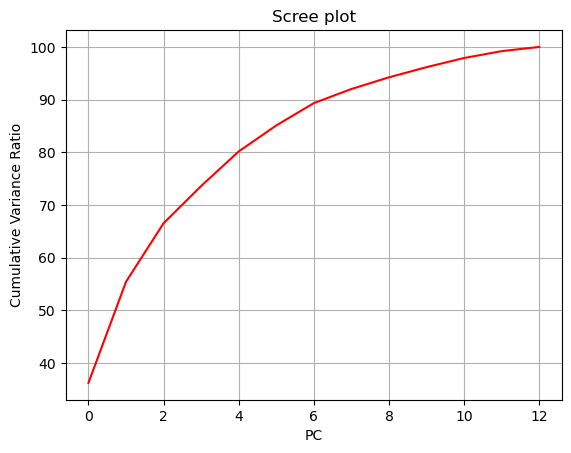

In [15]:
# Variance plot for PCA components obtained  Scree plot

plt.plot(var1,color="red")
plt.title('Scree plot')
plt.xlabel("PC")
plt.ylabel("Cumulative Variance Ratio")
plt.grid()
plt.show()

In [16]:
pca_values = pca.fit_transform(wine_normal)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [19]:
# Consider for 3 PC

pca_wine = PCA(n_components=3)
pca_wine_values = pca_wine.fit_transform(wine_normal)

np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4)*100) 

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [21]:
pca_wine.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

In [20]:
wine_final = pd.concat([wine_type,pd.DataFrame(pca_wine_values,columns=['pc1','pc2','pc3'])],axis=1)
wine_final

,Type,pc1,pc2,pc3
0,1,3.316751,-1.443463,-0.165739
1,1,2.209465,0.333393,-2.026457
2,1,2.516740,-1.031151,0.982819
3,1,3.757066,-2.756372,-0.176192
4,1,1.008908,-0.869831,2.026688
...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570
174,3,-2.601956,-1.757229,0.207581
175,3,-2.677839,-2.760899,-0.940942
176,3,-2.387017,-2.297347,-0.550696


<Axes: >

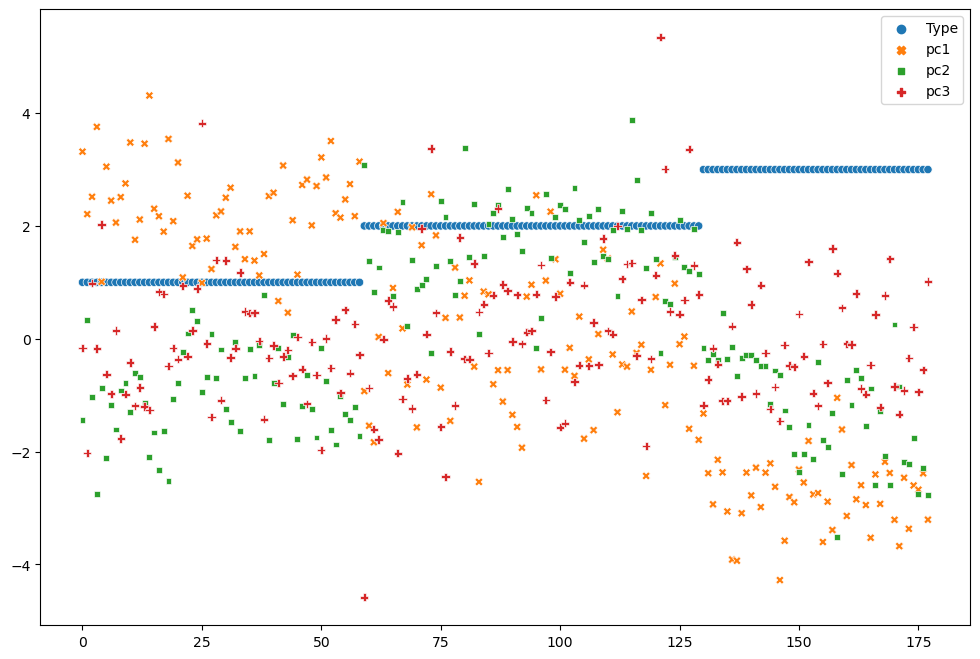

In [25]:
import seaborn as sns
fig=plt.figure(figsize=(12,8))
sns.scatterplot(data=wine_final)

<Axes: xlabel='pc1', ylabel='pc2'>

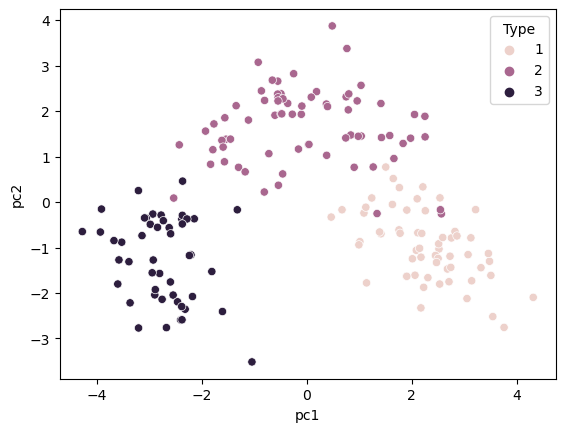

In [26]:
sns.scatterplot(data=wine_final, x='pc1', y='pc2',hue='Type')

In [27]:
# Checking the Collinearity among PCs

wine_pc = pd.DataFrame(pca_wine_values,columns=['pc1','pc2','pc3',])
np.round(wine_pc.corr(),3)

# There is no Collinearity 

,pc1,pc2,pc3
pc1,1.0,-0.0,-0.0
pc2,-0.0,1.0,0.0
pc3,-0.0,0.0,1.0


### Hierarchial and K-Means Clustering

In [29]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [30]:
# Principal Components 

wine_pc 

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [32]:
# Normalise 

def norm_fun(val):
    return (val-val.min())/(val.max()-val.min())
     

wine_pc_norm = norm_fun(wine_pc)
wine_pc_norm

,pc1,pc2,pc3
0,0.884094,0.280447,0.445028
1,0.755241,0.520989,0.257653
2,0.790998,0.336264,0.560688
3,0.935332,0.102712,0.443975
4,0.615534,0.358103,0.665806
...,...,...,...
173,0.105908,0.175825,0.427221
174,0.195345,0.237971,0.482621
175,0.186515,0.102099,0.366964
176,0.220357,0.164852,0.406262


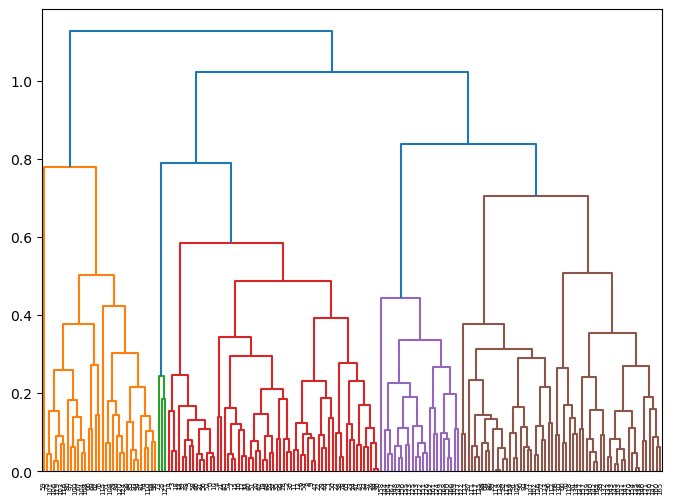

In [33]:
plt.figure(figsize=(8,6))
dendogram = sch.dendrogram(sch.linkage(wine_pc_norm,'complete'))

In [34]:
# Create Clusters

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
y_hc = hc.fit_predict(wine_pc_norm)

C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [35]:
wine_pc1 = wine_pc
wine_pc1['clusterid'] = y_hc
wine_pc1

,pc1,pc2,pc3,clusterid
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,0
174,-2.601956,-1.757229,0.207581,0
175,-2.677839,-2.760899,-0.940942,0
176,-2.387017,-2.297347,-0.550696,0


In [36]:
wine_pc1.groupby('clusterid').mean()

,pc1,pc2,pc3
clusterid,,,
0,-2.050921,-0.138209,0.145108
1,0.692043,2.043865,-0.340533
2,2.238862,-0.878947,-0.008064


In [37]:
# K-Means 

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings("ignore")

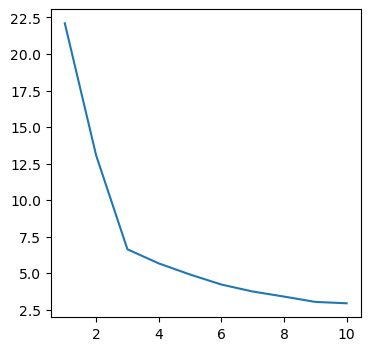

In [39]:
# Elbow Method

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(wine_pc_norm)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(4,4))
plt.plot(range(1,11),wcss)

In [40]:
# 3 Clusters

kmeans = KMeans(n_clusters=3)
kmeans.fit(wine_pc_norm)

KMeans(n_clusters=3)

In [41]:
silhouette_score(wine_pc_norm,kmeans.labels_)

0.4877692046652635

In [42]:
wine_pc2 = wine_pc
wine_pc2['clusterid'] = kmeans.labels_
wine_pc2.head()

,pc1,pc2,pc3,clusterid
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0


In [43]:
wine_pc2.groupby('clusterid').mean()

,pc1,pc2,pc3
clusterid,,,
0,2.288882,-0.959947,0.024933
1,-2.743930,-1.214191,-0.177245
2,-0.076018,1.736061,0.105355


### Manipulate Original Data to obtain optimum number of clusters

In [44]:
wine = pd.read_csv("wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [45]:
wine1 = wine.drop('Type',axis=1)
wine1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


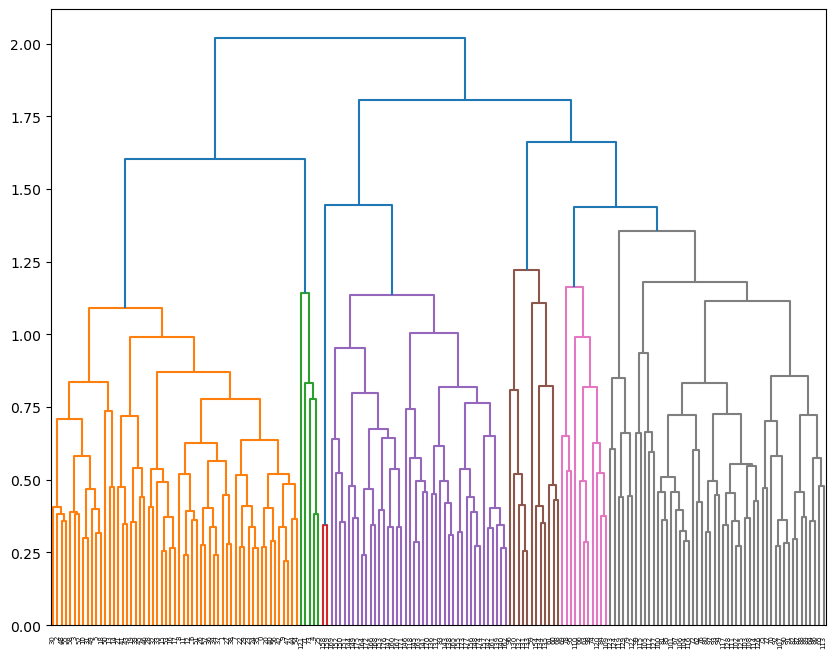

In [47]:
# Hierarchial 

wine1_norm = norm_fun(wine1)
plt.figure(figsize=(10,8))
dendogram = sch.dendrogram(sch.linkage(wine1_norm,'complete'))

In [48]:
# Clustering

hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
y_hc = hc.fit_predict(wine1_norm)
wine1['clusterid'] = y_hc

In [49]:
wine1.groupby('clusterid').mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clusterid,,,,,,,,,,,,,
0,12.280822,1.916301,2.227534,19.923288,94.739726,2.170274,1.926712,0.363562,1.570274,3.268082,1.025425,2.647671,526.616438
1,13.699194,1.997742,2.473871,17.559677,106.741935,2.854839,3.012742,0.290323,1.899355,5.466129,1.068710,3.171935,1091.725806
2,13.215349,3.537674,2.447674,21.558140,98.139535,1.700000,0.785349,0.462093,1.181163,7.508605,0.681628,1.742791,623.651163


In [50]:
# K-Means

wine2 = wine.drop('Type', axis=1)
wine2.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [51]:
# Normalising

wine2_norm = norm_fun(wine2)
wine2_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


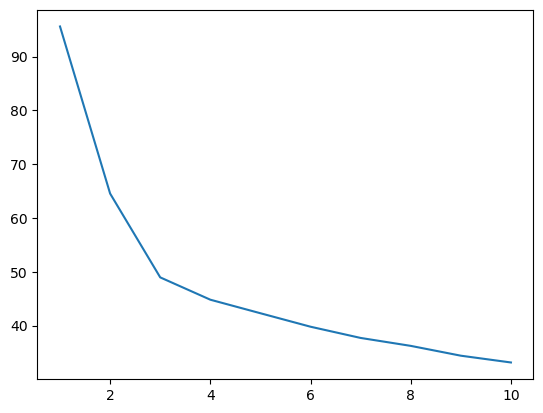

In [53]:
# Elbow Method

wcss=[]
for i in range(1,11):
    k_means=KMeans(n_clusters=i)
    k_means.fit(wine2_norm)
    wcss.append(k_means.inertia_) 
     
plt.plot(range(1,11),wcss)

In [54]:
# 3 Clusters

kmeans = KMeans(n_clusters=3)
kmeans.fit(wine2_norm)

KMeans(n_clusters=3)

In [55]:
silhouette_score(wine2_norm,kmeans.labels_)

0.3013463273503232

In [56]:
# 4 Clusters

kmeans1 = KMeans(n_clusters=4)
kmeans1.fit(wine2_norm)

silhouette_score(wine2_norm,kmeans1.labels_)

0.2614671504797431

In [ ]:
# From the clustering with original data, it can be concluded that 3 Clusters are optimum